Text(0.5, 1.0, 'Figure: Training Data')

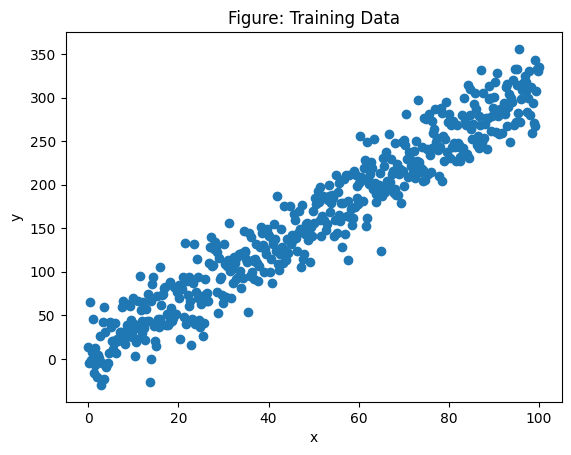

In [52]:
import tensorflow as tf    # 载入Tensorflow
import numpy as np     # 载入numpy
import matplotlib.pyplot as plt # 载入matplotlib

# 在Jupyter中，使用matplotlib显示图像需要设置为 inline 模式，否则不会在网页里显示图像
%matplotlib inline
# print("Tensorflow版本是：",tf.__version__) #显示当前TensorFlow版本

x_data = np.linspace(0, 100, 500)
np.random.seed(5)    # 设置随机数种子
# y = 2x +1 + 噪声， 其中，噪声的维度与x_data一致
y_data = 3.1234 * x_data + 2.98 + np.random.randn(*x_data.shape) * 25

# x_data,y_data
plt.scatter(x_data, y_data) 
plt.xlabel("x")
plt.ylabel("y")
plt.title("Figure: Training Data")

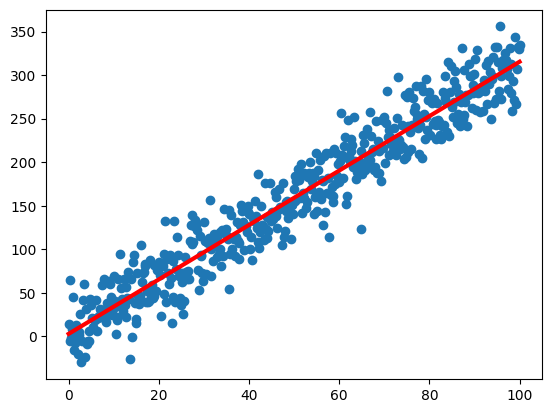

In [53]:
#画出随机生成数据的散点图
plt.scatter(x_data, y_data) 
# 画出我们想要通过学习得到的目标线性函数 y = 2x +1
plt.plot (x_data, 2.98 + 3.1234 * x_data,  'r',linewidth=3) 

Training Epoch: 01 Step: 020 loss=711.517456
Training Epoch: 01 Step: 040 loss=3313.114258
Training Epoch: 01 Step: 060 loss=875.844482
Training Epoch: 01 Step: 080 loss=802.342529
Training Epoch: 01 Step: 100 loss=3004.455322
Training Epoch: 01 Step: 120 loss=2470.903076
Training Epoch: 01 Step: 140 loss=8923.488281
Training Epoch: 01 Step: 160 loss=4409.451660
Training Epoch: 01 Step: 180 loss=2768.716553
Training Epoch: 01 Step: 200 loss=9159.358398
Training Epoch: 01 Step: 220 loss=3639.404785
Training Epoch: 01 Step: 240 loss=3859.448730
Training Epoch: 01 Step: 260 loss=9954.328125
Training Epoch: 01 Step: 280 loss=7612.657227
Training Epoch: 01 Step: 300 loss=9971.464844
Training Epoch: 01 Step: 320 loss=10737.111328
Training Epoch: 01 Step: 340 loss=10334.368164
Training Epoch: 01 Step: 360 loss=12541.880859
Training Epoch: 01 Step: 380 loss=10980.504883
Training Epoch: 01 Step: 400 loss=25923.652344
Training Epoch: 01 Step: 420 loss=11023.224609
Training Epoch: 01 Step: 440 lo

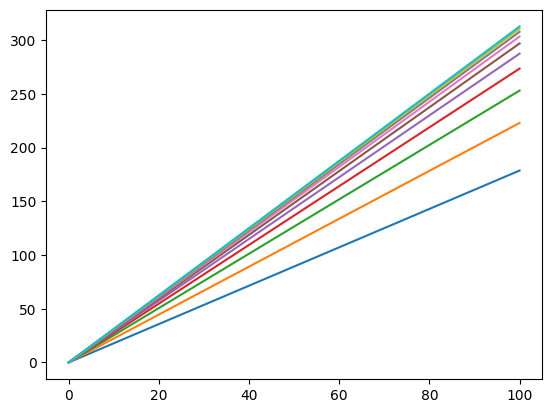

In [68]:
# 通过模型执行，将实现前向计算（预测计算）
def model(x, w, b):
    return tf.multiply(x, w) + b 

# 构建模型中的变量w，对应线性函数的斜率
w = tf.Variable(np.random.randn(),tf.float32)
# 构建模型中的变量b，对应线性函数的截距
b = tf.Variable(0.0,tf.float32)

# 定义均方差损失函数
def loss(x, y, w, b):
    err = model(x, w, b) - y    #  计算模型预测值和标签值的差异
    squared_err = tf.square(err)    #  求平方，得出方差
    return tf.reduce_mean(squared_err)   # 求均值，得出均方差.

training_epochs = 10    # 迭代次数（训练轮数）
learning_rate = 0.0000001155    # 学习率

# 计算样本数据[x,y]在参数[w,b]点上的梯度
def grad(x, y, w, b):
    with tf.GradientTape() as tape:
        loss_ = loss(x, y, w, b)
    return tape.gradient(loss_, [w, b])    # 返回梯度向量

step = 0    # 记录训练步数
loss_list = []    # 用于保存loss值的列表
display_step = 20    # 控制训练过程数据显示的频率，不是超参数

for epoch in range(training_epochs):
    for xs,ys in zip(x_data, y_data):
        
        loss_ = loss(xs, ys, w, b)    # 计算损失
        loss_list.append(loss_)    # 保存本次损失计算结果
        
        delta_w, delta_b = grad(xs, ys, w, b)    # 计算该当前[w,b]点的梯度
        change_w = delta_w * learning_rate    # 计算变量w需要调整的量
        change_b = delta_b * learning_rate    # 计算变量b需要调整的量
        w.assign_sub(change_w) # 变量w值变更为减去chage_w后的值
        b.assign_sub(change_b) # 变量b值变更为减去chage_b后的值
               
        step=step+1    # 训练步数+1
        if step % display_step == 0:    # 显示训练过程信息
            print("Training Epoch:", '%02d' % (epoch+1), "Step: %03d" % (step),"loss=%.6f" % (loss_))
    plt.plot(x_data, w.numpy() * x_data + b.numpy())    # 完成一轮训练后，画出回归的线条  

print ("w：", w.numpy()) # w的值应该在3.1234附近 
print ("b：", b.numpy()) # b的值应该在2.98附近 
    

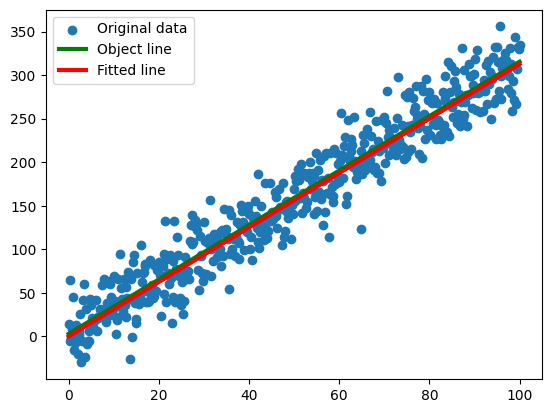

In [69]:
plt.scatter(x_data,y_data,label='Original data')
plt.plot (x_data, x_data * 3.1234 + 2.98, label='Object line',color='g', linewidth=3)
plt.plot (x_data, x_data * w.numpy() + b.numpy(),label='Fitted line',color='r', linewidth=3)
plt.legend(loc=2)# 通过参数loc指定图例位置

In [72]:
x_test = 5.79

predict = model(x_test,w.numpy(),b.numpy())
print("预测值：%f" % predict)

target = 3.1234 * x_test + 2.98
print("目标值：%f" % target)

预测值：18.129700
目标值：21.064486


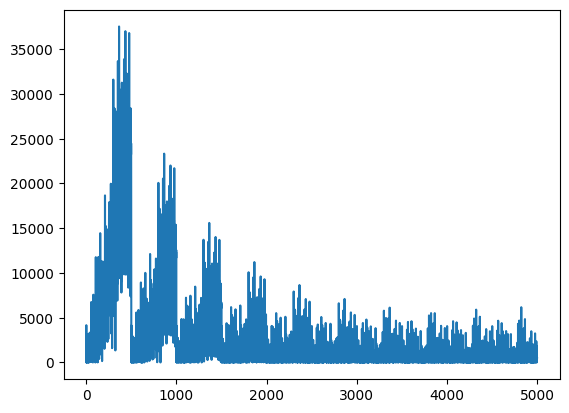

In [73]:
plt.plot(loss_list)